In [1]:
%matplotlib inline


# Filling the area between lines

This example shows how to use `~.axes.Axes.fill_between` to color the area
between two lines.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

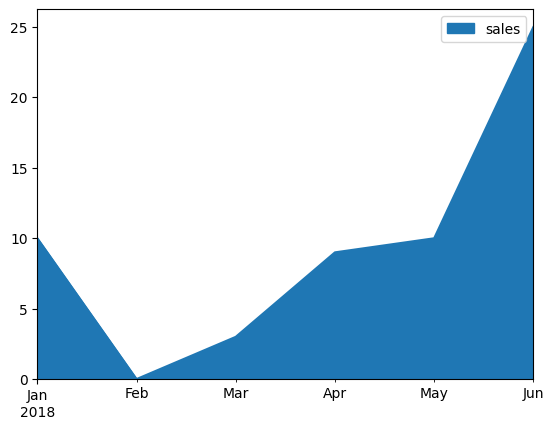

In [12]:
df = pd.DataFrame({
    'sales': [10, 0, 3, 9, 10, 25],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
ax = df.plot.area()

## Basic usage
The parameters *y1* and *y2* can be scalars, indicating a horizontal
boundary at the given y-values. If only *y1* is given, *y2* defaults to 0.



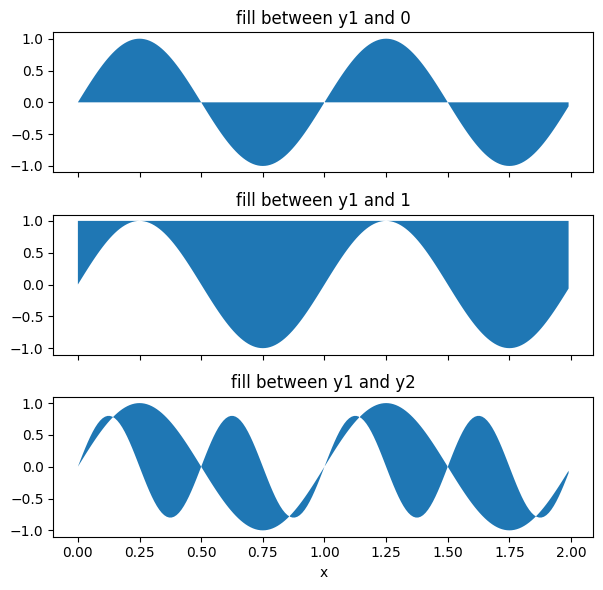

In [3]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

## Example: Confidence bands
A common application for `~.axes.Axes.fill_between` is the indication of
confidence bands.

`~.axes.Axes.fill_between` uses the colors of the color cycle as the fill
color. These may be a bit strong when applied to fill areas. It is
therefore often a good practice to lighten the color by making the area
semi-transparent using *alpha*.



In [ ]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

## Selectively filling horizontal regions
The parameter *where* allows to specify the x-ranges to fill. It's a boolean
array with the same size as *x*.

Only x-ranges of contiguous *True* sequences are filled. As a result the
range between neighboring *True* and *False* values is never filled. This
often undesired when the data points should represent a contiguous quantity.
It is therefore recommended to set ``interpolate=True`` unless the
x-distance of the data points is fine enough so that the above effect is not
noticeable. Interpolation approximates the actual x position at which the
*where* condition will change and extends the filling up to there.



In [ ]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
ax1.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

ax2.set_title('interpolation=True')
ax2.plot(x, y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3,
                 interpolate=True)
ax2.fill_between(x, y1, y2, where=(y1 <= y2), color='C1', alpha=0.3,
                 interpolate=True)
fig.tight_layout()

<div class="alert alert-info"><h4>Note</h4><p>Similar gaps will occur if *y1* or *y2* are masked arrays. Since missing
   values cannot be approximated, *interpolate* has no effect in this case.
   The gaps around masked values can only be reduced by adding more data
   points close to the masked values.</p></div>



## Selectively marking horizontal regions across the whole Axes
The same selection mechanism can be applied to fill the full vertical height
of the axes. To be independent of y-limits, we add a transform that
interprets the x-values in data coordinates and the y-values in axes
coordinates.

The following example marks the regions in which the y-data are above a
given threshold.



In [ ]:
fig, ax = plt.subplots()
x = np.arange(0, 4 * np.pi, 0.01)
y = np.sin(x)
ax.plot(x, y, color='black')

threshold = 0.75
ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax.fill_between(x, 0, 1, where=y > threshold,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.fill_between` / `matplotlib.pyplot.fill_between`
   - `matplotlib.axes.Axes.get_xaxis_transform`

